In [78]:
pip install category_encoders

     |████████████████████████████████| 82 kB 317 kB/s 


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [80]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMEX/train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMEX/test.csv')
dataset=dataset.drop_duplicates()
dataset.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [81]:
dataset.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


#ANALYSIS

NUMERICAL

In [82]:
discrete = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and (dataset[feature].nunique())<30 and feature not in ['loan_id']]

discrete

['no_of_children',
 'total_family_members',
 'migrant_worker',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

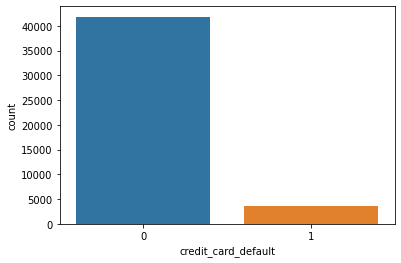

In [83]:
sns.countplot(x=discrete[5],data=dataset,order=dataset[discrete[5]].value_counts().index)

In [84]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=dataset[discrete[5]].value_counts())])
fig.show()

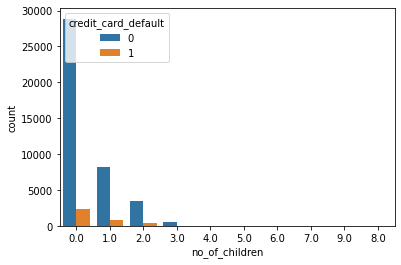

In [85]:
sns.countplot(x=discrete[0],hue='credit_card_default',data=dataset,order=dataset[discrete[0]].value_counts().index)

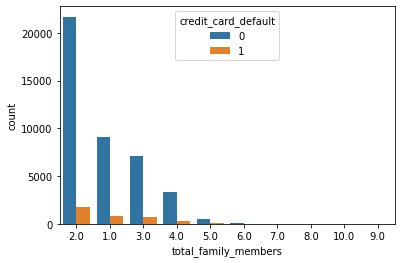

In [86]:
sns.countplot(x=discrete[1],hue='credit_card_default',data=dataset,order=dataset[discrete[1]].value_counts().index)

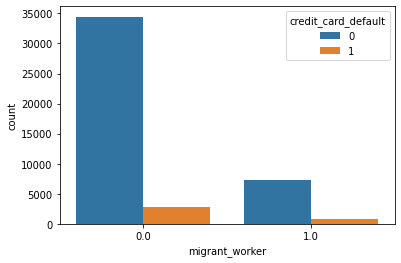

In [87]:
sns.countplot(x=discrete[2],hue='credit_card_default',data=dataset,order=dataset[discrete[2]].value_counts().index)

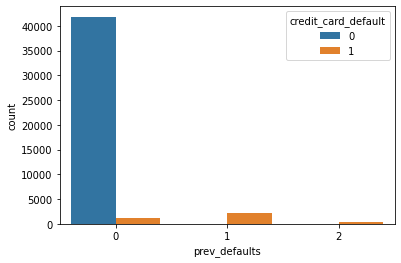

In [88]:
sns.countplot(x=discrete[3],hue='credit_card_default',data=dataset,order=dataset[discrete[3]].value_counts().index)

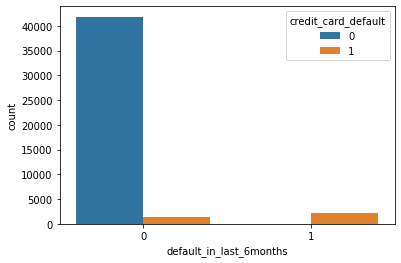

In [89]:
sns.countplot(x=discrete[4],hue='credit_card_default',data=dataset,order=dataset[discrete[4]].value_counts().index)

CONTINUOUS

In [90]:
len(dataset)

45528

In [91]:
continuous = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in discrete + ['Pin_Code','loan_id']]

continuous

['age',
 'net_yearly_income',
 'no_of_days_employed',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score']

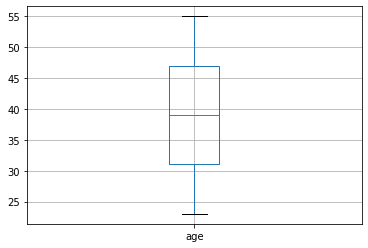

In [92]:
dataset.boxplot(column=continuous[0])

In [93]:
dataset = dataset[dataset['net_yearly_income']<500000]

In [94]:
len(dataset)

44663

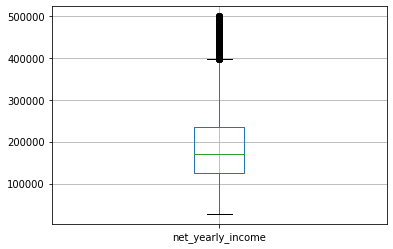

In [95]:
dataset.boxplot(column=continuous[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



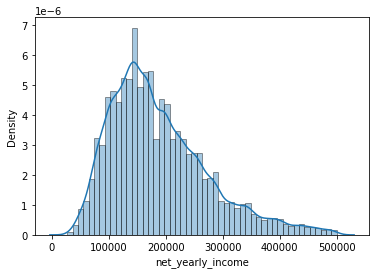

In [96]:
sns.distplot(dataset[continuous[1]],hist_kws=dict(edgecolor="k", linewidth=1))

In [97]:
log_income = np.log(dataset[continuous[1]])
sqrt_income = np.sqrt(dataset[continuous[1]])

print("Salary: ",dataset[continuous[1]].skew())
print("Log: ",log_income.skew())
print("Sqrt: ",sqrt_income.skew())

Salary:  0.965391281980459
Log:  -0.1940609298976228
Sqrt:  0.405647599738115


In [98]:
dataset = dataset[dataset['no_of_days_employed']<350000]

In [99]:
len(dataset)

36167

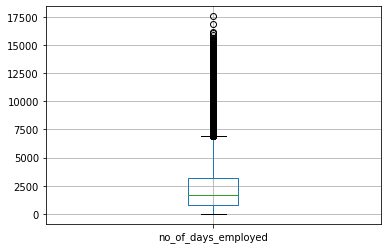

In [100]:
dataset.boxplot(column=continuous[2])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



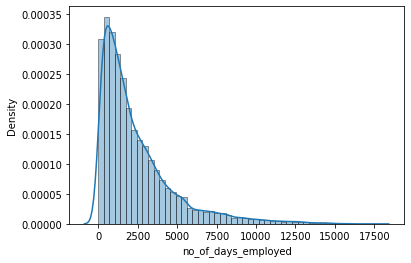

In [101]:
sns.distplot(dataset[continuous[2]],hist_kws=dict(edgecolor="k", linewidth=1))

In [102]:
log_emp = np.log(dataset[continuous[2]]+5)
sqrt_emp = np.sqrt(dataset[continuous[2]])

print("emp: ",dataset[continuous[2]].skew())
print("log_emp: ",log_emp.skew())
print("sqrt_emp: ",sqrt_emp.skew())

emp:  1.9422532611427166
log_emp:  -0.40968763757352444
sqrt_emp:  0.7838063855089417


In [103]:
dataset = dataset[dataset['yearly_debt_payments']<190000]

In [104]:
len(dataset)

36083

In [105]:
len(dataset[dataset['yearly_debt_payments']>140000])

13

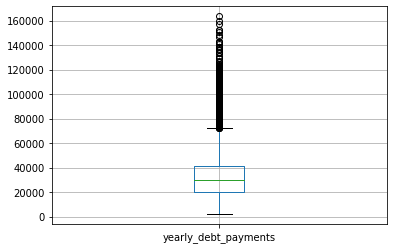

In [106]:
dataset.boxplot(column=continuous[3])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



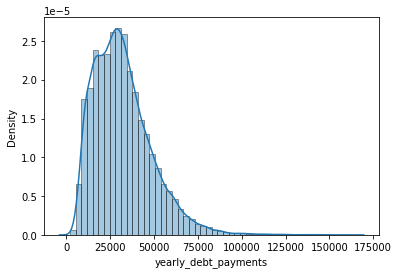

In [107]:
sns.distplot(dataset[continuous[3]],hist_kws=dict(edgecolor="k", linewidth=1))

In [108]:
log_debt = np.log(dataset[continuous[3]])
sqrt_debt = np.sqrt(dataset[continuous[3]])

print("debt: ",dataset[continuous[3]].skew())
print("log_debt: ",log_debt.skew())
print("sqrt_debt: ",sqrt_debt.skew())

debt:  1.169130050371028
log_debt:  -0.39114817541989055
sqrt_debt:  0.3368136841028462


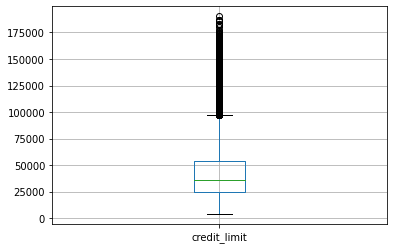

In [109]:
dataset.boxplot(column=continuous[4])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



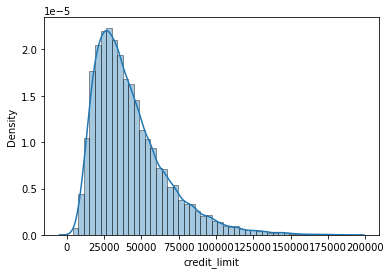

In [110]:
sns.distplot(dataset[continuous[4]],hist_kws=dict(edgecolor="k", linewidth=1))

In [111]:
log_cred_lim = np.log(dataset[continuous[4]]+1)
sqrt_cred_lim = np.sqrt(dataset[continuous[4]])

print("cred_lim: ",dataset[continuous[4]].skew())
print("Log: ",log_cred_lim.skew())
print("Sqrt: ",sqrt_cred_lim.skew())

cred_lim:  1.4249150128573114
Log:  -0.08361583590222862
Sqrt:  0.6484550429757775


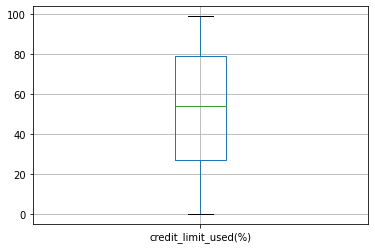

In [112]:
dataset.boxplot(column=continuous[5])

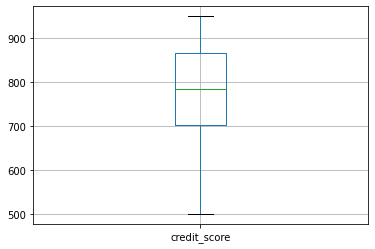

In [113]:
dataset.boxplot(column=continuous[6])

In [114]:
X_test.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [115]:
X_test = X_test.fillna({'owns_car':'N', 'no_of_days_employed':X_test['no_of_days_employed'].mean(),
                                   'migrant_worker': 0.0, 'yearly_debt_payments': X_test['yearly_debt_payments'].mean(),
                                   'credit_score': X_test['credit_score'].mean()})

In [116]:
dataset['log_income'] = log_income
X_test['log_income'] = np.log(X_test[continuous[1]])

In [117]:
dataset['log_emp_days'] = log_emp
X_test['log_emp_days'] = np.log(X_test[continuous[2]]+5)

In [118]:
dataset['sqrt_debt'] = sqrt_debt
X_test['sqrt_debt'] = np.sqrt(X_test[continuous[3]])

In [119]:
dataset['log_cred_lim'] = log_cred_lim
X_test['log_cred_lim'] = np.log(X_test[continuous[3]]+1)

CATEGORICAL

In [120]:
categorical = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

categorical

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [121]:
for feature in categorical:
  print("Number of categories in {} = {}".format(feature, len(dataset[feature].unique())))

Number of categories in customer_id = 36083
Number of categories in name = 3738
Number of categories in gender = 3
Number of categories in owns_car = 3
Number of categories in owns_house = 2
Number of categories in occupation_type = 19


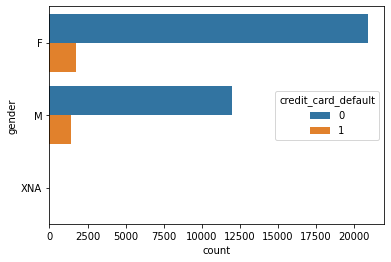

In [122]:
sns.countplot(y=categorical[2],hue='credit_card_default',data=dataset,order=dataset[categorical[2]].value_counts().index)

In [123]:
dataset[(dataset['gender']=='XNA') & (dataset['credit_card_default']==1)]['credit_card_default'].sum()

0

In [124]:
len(dataset[dataset['gender']=='XNA'])

1

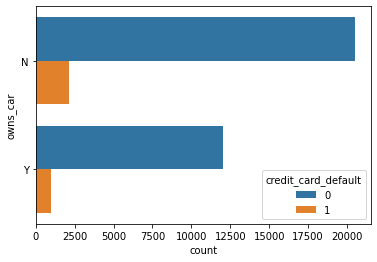

In [125]:
sns.countplot(y=categorical[3],hue='credit_card_default',data=dataset,order=dataset[categorical[3]].value_counts().index)

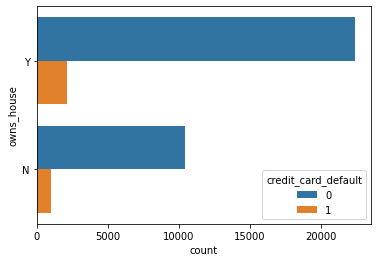

In [126]:
sns.countplot(y=categorical[4],hue='credit_card_default',data=dataset,order=dataset[categorical[4]].value_counts().index)

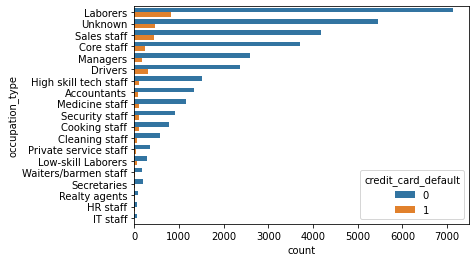

In [127]:
sns.countplot(y=categorical[5],hue='credit_card_default',data=dataset,order=dataset[categorical[5]].value_counts().index)

MISSING VALUES

In [128]:
featuresWithNaN = [feature for feature in dataset.columns if dataset[feature].isna().sum()>0]

for feature in featuresWithNaN:
  print(feature, np.round(dataset[feature].isnull().mean(),4), '% missing values')

owns_car 0.0119 % missing values
no_of_children 0.0175 % missing values
total_family_members 0.0018 % missing values
migrant_worker 0.0016 % missing values
credit_score 0.0002 % missing values


In [129]:
for feature in featuresWithNaN:
  print(feature, dataset[(dataset[feature].isnull()) & (dataset['credit_card_default']==1)]['credit_card_default'].sum())

owns_car 36
no_of_children 59
total_family_members 6
migrant_worker 4
credit_score 1


#CLEANING BASED ON ANALYSIS

FIXING CLASSES

In [130]:
dataset['gender'] = dataset['gender'].apply(lambda x: 'F' if x=='XNA' else x)

dataset['gender'].unique()

array(['F', 'M'], dtype=object)

In [131]:
X_test['gender'] = X_test['gender'].apply(lambda x: 'F' if x=='XNA' else x)

In [132]:
bins= [20,33,43,56]
labels = ['23-33','33-43','43-55']
dataset['AgeGroup'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=False)

In [133]:
X_test['AgeGroup'] = pd.cut(X_test['age'], bins=bins, labels=labels, right=False)

In [134]:
datset_temp = dataset.copy()

In [135]:
for feature in ['no_of_children','total_family_members','occupation_type']:
    temp = dataset.groupby(feature)['credit_card_default'].count()/len(dataset)
    temp_df = temp[temp>0.02].index
    datset_temp[feature] = np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare')

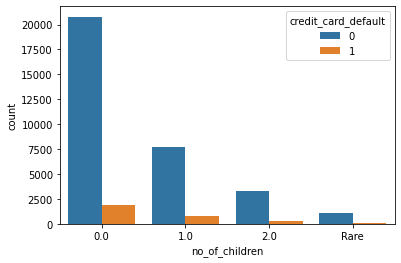

In [136]:
sns.countplot(x=discrete[0],hue='credit_card_default',data=datset_temp,order=datset_temp[discrete[0]].value_counts().index)

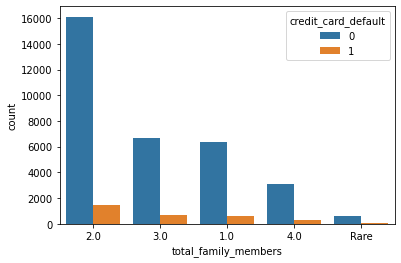

In [137]:
sns.countplot(x=discrete[1],hue='credit_card_default',data=datset_temp,order=datset_temp[discrete[1]].value_counts().index)

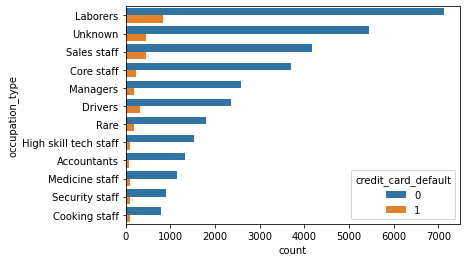

In [138]:
sns.countplot(y=categorical[5],hue='credit_card_default',data=datset_temp,order=datset_temp[categorical[5]].value_counts().index)

In [139]:
for feature in ['no_of_children','total_family_members','occupation_type']:
    temp = dataset.groupby(feature)['credit_card_default'].count()/len(dataset)
    temp_df = temp[temp>0.02].index
    dataset[feature] = np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare')

In [140]:
for feature in ['no_of_children','total_family_members','occupation_type']:
    temp = X_test.groupby(feature)['customer_id'].count()/len(X_test)
    temp_df = temp[temp>0.02].index
    X_test[feature] = np.where(X_test[feature].isin(temp_df),X_test[feature],'Rare')

In [141]:
dataset.AgeGroup = dataset.AgeGroup.astype('object')
dataset.no_of_children = dataset.no_of_children.astype('object')
dataset.total_family_members = dataset.total_family_members.astype('object')
dataset.occupation_type = dataset.occupation_type.astype('object')

In [142]:
X_test.AgeGroup = X_test.AgeGroup.astype('object')
X_test.no_of_children = X_test.no_of_children.astype('object')
X_test.total_family_members = X_test.total_family_members.astype('object')
X_test.occupation_type = X_test.occupation_type.astype('object')

FILLING NAN VALUES

In [143]:
dataset.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   430
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed          0
occupation_type              0
total_family_members         0
migrant_worker              58
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 7
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
log_income                   0
log_emp_days                 0
sqrt_debt                    0
log_cred_lim                 0
AgeGroup                     0
dtype: int64

In [144]:
dataset = dataset.dropna()
dataset.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
log_income                 0
log_emp_days               0
sqrt_debt                  0
log_cred_lim               0
AgeGroup                   0
dtype: int64

In [145]:
X_test.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
log_income                 0
log_emp_days               0
sqrt_debt                  0
log_cred_lim               0
AgeGroup                   0
dtype: int64

In [146]:
for i in dataset:
  print(i , len(dataset[i].unique()))

customer_id 35590
name 3724
age 33
gender 2
owns_car 2
owns_house 2
no_of_children 4
net_yearly_income 35577
no_of_days_employed 7756
occupation_type 12
total_family_members 5
migrant_worker 2
yearly_debt_payments 35465
credit_limit 35488
credit_limit_used(%) 100
credit_score 450
prev_defaults 3
default_in_last_6months 2
credit_card_default 2
log_income 35577
log_emp_days 7756
sqrt_debt 35465
log_cred_lim 35488
AgeGroup 3


In [147]:
dataset = dataset.drop(['net_yearly_income','no_of_days_employed','yearly_debt_payments','credit_limit'],axis=1)
X_test = X_test.drop(['net_yearly_income','no_of_days_employed','yearly_debt_payments','credit_limit'],axis=1)

CORRELATION

In [148]:
dataset.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,occupation_type,total_family_members,migrant_worker,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,log_income,log_emp_days,sqrt_debt,log_cred_lim,AgeGroup
0,CST_115179,ita Bose,46,F,N,Y,0.0,Unknown,1.0,1.0,73,544.0,2,1,1,11.589276,6.424869,181.852358,9.835847,43-55
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,Laborers,2.0,0.0,52,857.0,0,0,0,11.606986,7.928766,123.812479,10.538640,23-33
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,Laborers,2.0,0.0,43,650.0,0,0,0,12.346500,5.342334,220.037724,10.635840,33-43
3,CST_128288,Rie,39,F,N,Y,0.0,Core staff,2.0,0.0,20,754.0,0,0,0,11.714443,9.388152,150.247662,10.392949,33-43
4,CST_151355,McCool,46,M,Y,Y,0.0,Core staff,1.0,0.0,75,927.0,0,0,0,12.866919,7.288928,195.660292,10.877134,43-55


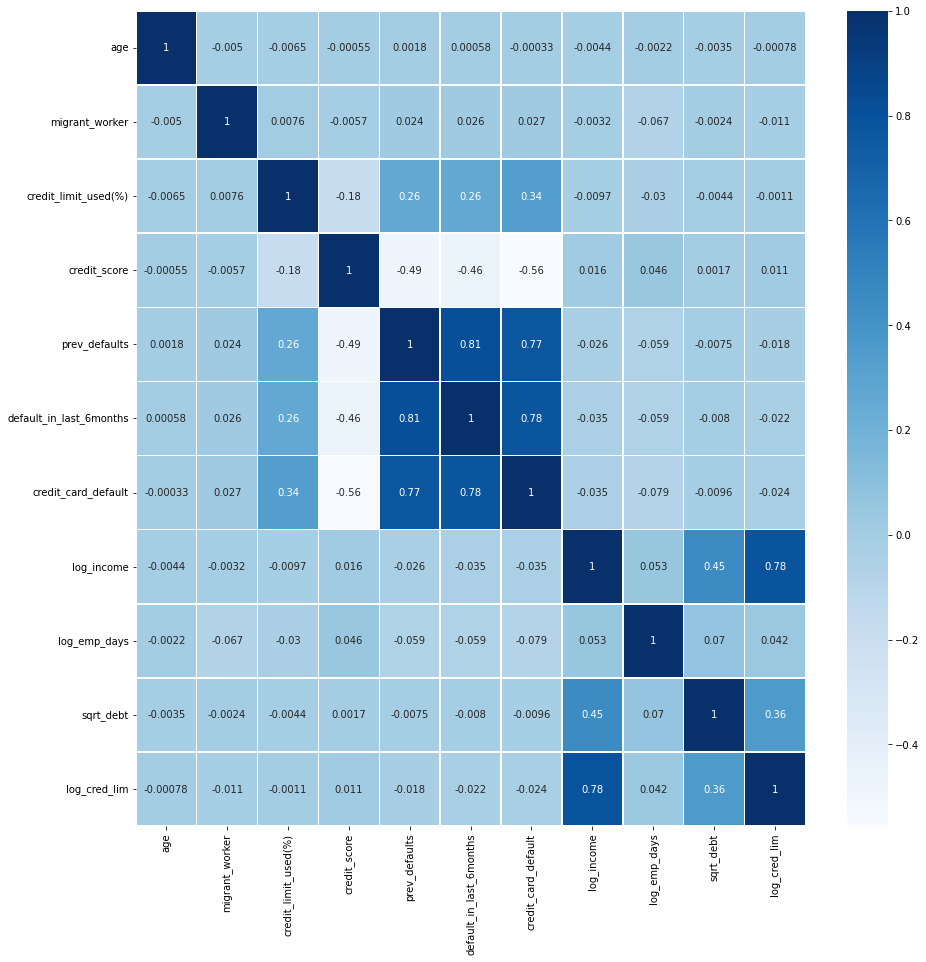

In [149]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(dataset.corr(), cmap='Blues',annot=True, linewidths=.5, ax=ax)

In [150]:
dataset = dataset.drop(['prev_defaults','customer_id','name','age','log_income','default_in_last_6months'],axis=1) # removing 'prev_defaults','customer_id','name','age','log_income',last 6 months gave best acc rf

In [151]:
customer_id = X_test['customer_id']
X_test = X_test.drop(['prev_defaults','customer_id','name','age','log_income','default_in_last_6months'],axis=1)

In [152]:
dataset.head()

,gender,owns_car,owns_house,no_of_children,occupation_type,total_family_members,migrant_worker,credit_limit_used(%),credit_score,credit_card_default,log_emp_days,sqrt_debt,log_cred_lim,AgeGroup
0,F,N,Y,0.0,Unknown,1.0,1.0,73,544.0,1,6.424869,181.852358,9.835847,43-55
1,M,N,Y,0.0,Laborers,2.0,0.0,52,857.0,0,7.928766,123.812479,10.538640,23-33
2,M,N,Y,0.0,Laborers,2.0,0.0,43,650.0,0,5.342334,220.037724,10.635840,33-43
3,F,N,Y,0.0,Core staff,2.0,0.0,20,754.0,0,9.388152,150.247662,10.392949,33-43
4,M,Y,Y,0.0,Core staff,1.0,0.0,75,927.0,0,7.288928,195.660292,10.877134,43-55


SPLIT

In [153]:
X = dataset.drop(['credit_card_default'],axis=1)
y = dataset['credit_card_default']

In [154]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [155]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 42,stratify=dataset.credit_card_default.values)

ENCODING

In [156]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()
cbe_encoder.fit(X_train, y_train)
X_train = cbe_encoder.transform(X_train)
X_val = cbe_encoder.transform(X_val)
X_test = cbe_encoder.transform(X_test)

In [157]:
# fs = SelectKBest(score_func=f_classif, k=12)
# X_train = fs.fit_transform(X_train, y_train)
# X_val = fs.transform(X_val)
# X_test = fs.transform(X_test)

In [158]:
X_train.shape

(30251, 13)

SCALING

In [159]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

TREATING IMBALANCE

In [160]:
# from imblearn.under_sampling import RandomUnderSampler

In [161]:
# undersample = RandomUnderSampler(sampling_strategy=0.25)
# X_train, y_train = undersample.fit_resample(X_train, y_train)

# print(X_train.shape, y_train.shape)

In [162]:
# print(X_val.shape, y_val.shape)

In [163]:
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=y_train.value_counts())])
fig.show()

Create X, y for gridsearch

In [164]:
X_cat = np.concatenate([X_train, X_val])
y_cat = np.concatenate([y_train,y_val])

In [165]:
X_train.shape

(30251, 13)

In [166]:
X_val.shape

(5339, 13)

In [167]:
X_cat.shape

(35590, 13)

#MODEL TRAINING

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV #92.57

##ENSEMBLE LEARNING

CATBOOST

In [169]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [170]:
from catboost import CatBoostClassifier
classifier_ctb = CatBoostClassifier(max_depth=3,n_estimators=160,random_state=0) #max_depth=3,n_estimators=160, = 92.75
classifier_ctb.fit(X_train, y_train)

Learning rate set to 0.237155
0:	learn: 0.5028747	total: 50.8ms	remaining: 8.07s
1:	learn: 0.3797065	total: 54ms	remaining: 4.27s
2:	learn: 0.2955527	total: 57.1ms	remaining: 2.99s
3:	learn: 0.2384459	total: 64.6ms	remaining: 2.52s
4:	learn: 0.1937958	total: 68ms	remaining: 2.11s
5:	learn: 0.1632406	total: 71.3ms	remaining: 1.83s
6:	learn: 0.1361680	total: 74.7ms	remaining: 1.63s
7:	learn: 0.1178330	total: 78ms	remaining: 1.48s
8:	learn: 0.1018947	total: 81.3ms	remaining: 1.36s
9:	learn: 0.0930208	total: 84.6ms	remaining: 1.27s
10:	learn: 0.0822065	total: 88ms	remaining: 1.19s
11:	learn: 0.0738849	total: 91.3ms	remaining: 1.13s
12:	learn: 0.0673696	total: 94.7ms	remaining: 1.07s
13:	learn: 0.0640513	total: 98.1ms	remaining: 1.02s
14:	learn: 0.0598505	total: 101ms	remaining: 981ms
15:	learn: 0.0566744	total: 105ms	remaining: 944ms
16:	learn: 0.0540439	total: 112ms	remaining: 945ms
17:	learn: 0.0520999	total: 116ms	remaining: 913ms
18:	learn: 0.0503651	total: 119ms	remaining: 885ms
19:	l

In [171]:
y_pred_ctb = classifier_ctb.predict(X_val)

In [172]:
cm_ctb = confusion_matrix(y_val, y_pred_ctb)
print(cm_ctb)
acc_ctb = accuracy_score(y_val, y_pred_ctb)
print(acc_ctb)

[[4864    8]
 [  85  382]]
0.9825810076793406


In [173]:
100 * f1_score(y_val,y_pred_ctb,average='macro')

94.10062047642295

In [174]:
parameters = [{'max_depth': [4,6,8,10],'n_estimators':[100,120,140,150]}]
grid_search = GridSearchCV(estimator = classifier_ctb,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 5,
                           n_jobs=-1)
grid_search.fit(X_cat, y_cat)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f}".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
# Best Accuracy: 92.62
# Best Parameters: {'max_depth': 4, 'n_estimators': 150}

Learning rate set to 0.391157
0:	learn: 0.4029015	total: 5.57ms	remaining: 551ms
1:	learn: 0.2713860	total: 9.66ms	remaining: 474ms
2:	learn: 0.1900089	total: 13.8ms	remaining: 447ms
3:	learn: 0.1389343	total: 18ms	remaining: 433ms
4:	learn: 0.1069981	total: 22.3ms	remaining: 423ms
5:	learn: 0.0889980	total: 26.2ms	remaining: 410ms
6:	learn: 0.0740400	total: 30.3ms	remaining: 403ms
7:	learn: 0.0639061	total: 34.6ms	remaining: 398ms
8:	learn: 0.0575667	total: 38.9ms	remaining: 394ms
9:	learn: 0.0539197	total: 42.8ms	remaining: 385ms
10:	learn: 0.0504177	total: 47.1ms	remaining: 381ms
11:	learn: 0.0494940	total: 51.2ms	remaining: 375ms
12:	learn: 0.0471219	total: 55.4ms	remaining: 371ms
13:	learn: 0.0456096	total: 59.8ms	remaining: 367ms
14:	learn: 0.0451583	total: 63.8ms	remaining: 362ms
15:	learn: 0.0441639	total: 68.1ms	remaining: 357ms
16:	learn: 0.0436326	total: 72.1ms	remaining: 352ms
17:	learn: 0.0431888	total: 76.2ms	remaining: 347ms
18:	learn: 0.0427008	total: 80.4ms	remaining: 

DECISTION TREE

In [175]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_depth=1,max_features='auto', min_samples_split= 2,random_state = 0) #criterion = 'gini', max_depth=1,max_features='auto', min_samples_split= 2,  =92.8
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_features='auto', random_state=0)

In [176]:
y_pred_dt = classifier_dt.predict(X_val)

In [177]:
cm_dt = confusion_matrix(y_val, y_pred_dt)
print(cm_dt)
acc_dt = accuracy_score(y_val, y_pred_dt)
print(acc_dt)

[[4872    0]
 [ 102  365]]
0.9808952987450833


In [178]:
100 * f1_score(y_val,y_pred_dt,average='macro')

93.35221546430412

In [179]:
parameters = [{'criterion':['gini','entropy'],'max_depth':[1,2],'min_samples_split': [2,3,5],'max_features':['auto']}]
grid_search = GridSearchCV(estimator = classifier_dt,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 5,
                           n_jobs=-1)
grid_search.fit(X_cat, y_cat)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
# Best Accuracy: 92.65 %
# Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 0.1}

Best Accuracy: 92.57 %
Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2}


RANDOM FOREST

In [180]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion= 'gini', max_depth= 15, min_samples_split= 4, max_features=4, n_estimators= 250,random_state=0) #criterion= 'gini', max_depth= 15, min_samples_split= 3, n_estimators= 120, = 93.0
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=4, min_samples_split=4,
                       n_estimators=250, random_state=0)

In [181]:
y_pred_rf = classifier_rf.predict(X_val)

In [182]:
cm_rf = confusion_matrix(y_val, y_pred_rf) 
print(cm_rf)
acc_rf = accuracy_score(y_val, y_pred_rf)
print(acc_rf)

[[4866    6]
 [  94  373]]
0.9812699007304738


In [183]:
100 * f1_score(y_val,y_pred_rf,average='macro')

93.58129098404015

In [184]:
parameters = [{'n_estimators': [125], 'criterion':['gini'],'max_depth':[14,15,16], 'min_samples_split':[2,3], 'max_features': [9,11,13]}]
grid_search = GridSearchCV(estimator = classifier_rf,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 5,
                           n_jobs=-1)
grid_search.fit(X_cat,y_cat)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
# Best Accuracy: 92.65 %
# Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 120}

Best Accuracy: 92.46 %
Best Parameters: {'criterion': 'gini', 'max_depth': 16, 'max_features': 11, 'min_samples_split': 2, 'n_estimators': 125}


XG-BOOST

In [185]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.75, n_estimators= 9,random_state=0) #grid search = learning_rate= 1, n_estimators= 10,  = 92.45
classifier_xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.75, n_estimators=9)

In [186]:
y_pred_xgb = classifier_xgb.predict(X_val)

In [187]:
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
print(cm_xgb)
acc_xgb = accuracy_score(y_val, y_pred_xgb)
print(acc_xgb)

[[4872    0]
 [ 102  365]]
0.9808952987450833


In [188]:
100 * f1_score(y_val,y_pred_xgb,average='macro')

93.35221546430412

In [189]:
parameters = [{'learning_rate':[0.9,1,1.1],'n_estimators':[9,10,11]}]
grid_search = GridSearchCV(estimator = classifier_xgb,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 5,
                           n_jobs=-1)
grid_search.fit(X_cat,y_cat)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
# est Accuracy: 92.68 %
# Best Parameters: {'learning_rate': 1, 'n_estimators': 10}

Best Accuracy: 92.73 %
Best Parameters: {'learning_rate': 1, 'n_estimators': 10}


ADA BOOST

In [190]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 1.75, n_estimators= 40,random_state=0) # algorithm='SAMME', learning_rate= 1.75, n_estimators= 60, = 92.61
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1.75, n_estimators=40, random_state=0)

In [191]:
y_pred_ada = ada.predict(X_val)

In [192]:
cm_ada = confusion_matrix(y_val, y_pred_ada)
print(cm_ada)
acc_ada = accuracy_score(y_val, y_pred_ada)
print(acc_ada)

[[4846   26]
 [  85  382]]
0.979209589810826


In [193]:
100 * f1_score(y_val,y_pred_ada,average='macro')

93.09098963874034

In [194]:
parameters = [{'algorithm':['SAMME', 'SAMME.R'],'learning_rate':[1.5,1.75,2],'n_estimators':[30,40,50]}]
grid_search = GridSearchCV(estimator = ada,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 5,
                           n_jobs=-1)
grid_search.fit(X_cat,y_cat)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
# Best Accuracy: 92.64 %
# Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.75, 'n_estimators': 60}

Best Accuracy: 92.67 %
Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 40}


##STANDARD MODELS

LOGISTIC

In [195]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(C= 0.75, penalty= 'l2',random_state=0) 
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=0.75, random_state=0)

In [196]:
y_pred_logistic = classifier_logistic.predict(X_val)

In [197]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_pred_logistic)
print(cm)
acc = accuracy_score(y_val, y_pred_logistic)
print(acc)

[[4830   42]
 [  77  390]]
0.9777111818692639


In [198]:
100 * f1_score(y_val,y_pred_logistic,average='macro')

92.77308836749334

In [199]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l2'],'C': [0.25,0.5,0.75] }]
grid_search = GridSearchCV(estimator = classifier_logistic,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 5,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
# est Accuracy: 92.57 %
# Best Parameters: {'C': 0.1, 'penalty': 'l2'}

Best Accuracy: 91.73 %
Best Parameters: {'C': 0.75, 'penalty': 'l2'}


SVM

In [200]:
from sklearn.svm import SVC
classifier_svm = SVC(C=0.75,kernel='linear',random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(C=0.75, kernel='linear', random_state=0)

In [201]:
y_pred_svm = classifier_svm.predict(X_val)

In [202]:
cm_svm = confusion_matrix(y_val, y_pred_svm)
print(cm_svm)
acc_svm = accuracy_score(y_val, y_pred_svm)
print(acc_svm)

[[4849   23]
 [  87  380]]
0.9793968908035212


In [203]:
100 * f1_score(y_val,y_pred_svm,average='macro')

93.1173941984962

In [204]:
parameters = [{'C': [0.5,0.75,1], 'kernel': ['linear']}]
grid_search = GridSearchCV(estimator = classifier_svm,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 5)
grid_search.fit(X_cat,y_cat)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.18 %
Best Parameters: {'C': 0.75, 'kernel': 'linear'}


KERNEL SVM

In [205]:
from sklearn.svm import SVC
classifier_kernel = SVC(kernel= 'rbf',random_state = 0) #C=0.5,kernel = 'rbf', random_state = 0, gamma=0.2
classifier_kernel.fit(X_train, y_train)

SVC(random_state=0)

In [206]:
y_pred_kernel = classifier_kernel.predict(X_val)

In [207]:
cm_kernel = confusion_matrix(y_val, y_pred_kernel)
print(cm_kernel)
acc_kernel = accuracy_score(y_val, y_pred_kernel)
print(acc_kernel)

[[4848   24]
 [  88  379]]
0.9790222888181307


In [208]:
100 * f1_score(y_val,y_pred_kernel,average='macro')

92.99225591119612

KNN

In [209]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier() #leaf_size= 1,n_neighbors = 7, metric = 'minkowski', p = 2,weights= 'uniform'
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [210]:
y_pred_knn = classifier_knn.predict(X_val)

In [211]:
cm_knn = confusion_matrix(y_val, y_pred_knn)
print(cm_knn)
acc_knn = accuracy_score(y_val, y_pred_knn)
print(acc_knn)

[[4824   48]
 [ 179  288]]
0.9574826746581757


In [212]:
100 * f1_score(y_val,y_pred_knn,average='macro')

84.71613727004745

In [213]:
parameters = [{'n_neighbors': [2,5,10], 'weights': ['distance'], 'leaf_size': [5,7,10],'p': [1], 
               'metric': ['minkowski']}]
grid_search = GridSearchCV(estimator = classifier_knn,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 3,
                           n_jobs=-1)
grid_search.fit(X_cat,y_cat)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
# Best Accuracy: 90.53 %
# Best Parameters: {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Best Accuracy: 84.89 %
Best Parameters: {'leaf_size': 5, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


NAIVE BAYES

In [214]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [215]:
y_pred_nb = classifier_nb.predict(X_val)

In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_nb = confusion_matrix(y_val, y_pred_nb)
print(cm_nb)
acc_nb = accuracy_score(y_val, y_pred_nb)
print(acc_nb)

[[4796   76]
 [  57  410]]
0.9750889679715302


In [217]:
100 * f1_score(y_val,y_pred_nb,average='macro')

92.33823104956072

In [218]:
from sklearn.naive_bayes import BernoulliNB
classifier_bern = BernoulliNB()
classifier_bern.fit(X_train, y_train)

BernoulliNB()

In [219]:
y_pred_b = classifier_bern.predict(X_val)

In [220]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_nb = confusion_matrix(y_val, y_pred_b)
print(cm_nb)
acc_nb = accuracy_score(y_val, y_pred_b)
print(acc_nb)

[[4845   27]
 [ 445   22]]
0.9115939314478366


In [221]:
100 * f1_score(y_val,y_pred_b,average='macro')

51.94118840672577

##NEURAL NETWORKS

In [222]:
import tensorflow as tf

In [223]:
from keras.layers import Dropout

ann = tf.keras.models.Sequential() 
ann.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
ann.add(Dropout(0.6))
ann.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [224]:
ann.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
hist = ann.fit(X_cat, y_cat,epochs=5, batch_size=16,validation_split=0.2)

Epoch 1/5
1780/1780 [==============================] - 14s 7ms/step - loss: 0.0979 - accuracy: 0.9602 - val_loss: 0.0617 - val_accuracy: 0.9733
Epoch 2/5
1780/1780 [==============================] - 12s 7ms/step - loss: 0.0720 - accuracy: 0.9703 - val_loss: 0.0596 - val_accuracy: 0.9744
Epoch 3/5
1780/1780 [==============================] - 12s 7ms/step - loss: 0.0651 - accuracy: 0.9711 - val_loss: 0.0548 - val_accuracy: 0.9768
Epoch 4/5
1780/1780 [==============================] - 11s 6ms/step - loss: 0.0655 - accuracy: 0.9719 - val_loss: 0.0568 - val_accuracy: 0.9774
Epoch 5/5
1780/1780 [==============================] - 12s 7ms/step - loss: 0.0619 - accuracy: 0.9734 - val_loss: 0.0588 - val_accuracy: 0.9723


In [225]:
y_pred = ann.predict(X_val)
y_pred = (y_pred > 0.5)

In [226]:
cm = confusion_matrix(y_val, y_pred)
print(cm)
acc = accuracy_score(y_val, y_pred)
print(acc)

[[4866    6]
 [ 137  330]]
0.9732159580445776


In [227]:
100 * f1_score(y_val,y_pred,average='macro')

90.37183977804752

In [228]:
ann2 = tf.keras.models.Sequential() 
ann2.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist2 = ann2.fit(X_cat, y_cat, epochs=5, batch_size=10, validation_split=0.2)

Epoch 1/5
2848/2848 [==============================] - 7s 2ms/step - loss: 0.0858 - accuracy: 0.9668 - val_loss: 0.0586 - val_accuracy: 0.9756
Epoch 2/5
2848/2848 [==============================] - 6s 2ms/step - loss: 0.0599 - accuracy: 0.9741 - val_loss: 0.0559 - val_accuracy: 0.9754
Epoch 3/5
2848/2848 [==============================] - 5s 2ms/step - loss: 0.0572 - accuracy: 0.9751 - val_loss: 0.0569 - val_accuracy: 0.9757
Epoch 4/5
2848/2848 [==============================] - 5s 2ms/step - loss: 0.0565 - accuracy: 0.9744 - val_loss: 0.0559 - val_accuracy: 0.9725
Epoch 5/5
2848/2848 [==============================] - 6s 2ms/step - loss: 0.0555 - accuracy: 0.9741 - val_loss: 0.0526 - val_accuracy: 0.9736


In [229]:
y_pred = ann2.predict(X_val)
y_pred = (y_pred > 0.5)

In [230]:
cm = confusion_matrix(y_val, y_pred)
print(cm)
acc = accuracy_score(y_val, y_pred)
print(acc)

[[4810   62]
 [  66  401]]
0.9760254729350065


In [231]:
100 * f1_score(y_val,y_pred,average='macro')

92.46173463759865

In [232]:
ann3 = tf.keras.models.Sequential() 
ann3.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
ann3.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
ann3.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist3 = ann3.fit(X_cat, y_cat, epochs=5, batch_size=10, validation_split=0.2)

Epoch 1/5
2848/2848 [==============================] - 16s 5ms/step - loss: 0.0731 - accuracy: 0.9693 - val_loss: 0.0785 - val_accuracy: 0.9616
Epoch 2/5
2848/2848 [==============================] - 14s 5ms/step - loss: 0.0589 - accuracy: 0.9735 - val_loss: 0.0517 - val_accuracy: 0.9777
Epoch 3/5
2848/2848 [==============================] - 14s 5ms/step - loss: 0.0547 - accuracy: 0.9751 - val_loss: 0.0548 - val_accuracy: 0.9760
Epoch 4/5
2848/2848 [==============================] - 14s 5ms/step - loss: 0.0531 - accuracy: 0.9753 - val_loss: 0.0495 - val_accuracy: 0.9765
Epoch 5/5
2848/2848 [==============================] - 14s 5ms/step - loss: 0.0524 - accuracy: 0.9757 - val_loss: 0.0533 - val_accuracy: 0.9742


In [233]:
y_pred = ann3.predict(X_val)
y_pred = (y_pred > 0.5)

In [234]:
cm = confusion_matrix(y_val, y_pred)
print(cm)
acc = accuracy_score(y_val, y_pred)
print(acc)

[[4849   23]
 [ 109  358]]
0.9752762689642255


In [235]:
100 * f1_score(y_val,y_pred,average='macro')

91.5455670934183

In [236]:
classifiers = [ann,ann2,ann3]

names = ['ann','ann2','ann3']
j=0
for i in classifiers:
  print(i)
  i.fit(X_cat, y_cat)
  y_out = i.predict(X_test)
  y_out = (y_out > 0.5)
  df = np.concatenate([np.array(customer_id).reshape(len(customer_id),1),y_out.reshape(len(customer_id),1)],1)
  df = pd.DataFrame(df)
  df.columns = ['customer_id','credit_card_default']
  df.set_index('customer_id', inplace=True)
  df.to_csv(names[j]+'2.csv')
  j+=1

1113/1113 [==============================] - 6s 5ms/step - loss: 0.0466 - accuracy: 0.9775


#RESULTS TO CSV

In [ ]:
classifiers = [CatBoostClassifier(max_depth=3,n_estimators=160,random_state=0),
DecisionTreeClassifier(criterion = 'gini', max_depth=1,max_features='auto', min_samples_split= 2,random_state = 0),
RandomForestClassifier(criterion= 'gini', max_depth= 15, min_samples_split= 3, n_estimators= 120,random_state=0),
XGBClassifier(learning_rate= 0.75, n_estimators= 9,random_state=0),
AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 1.75, n_estimators= 40,random_state=0),
LogisticRegression(C= 0.75, penalty= 'l2',random_state=0),
SVC(C=0.75,kernel='linear',random_state = 0),
SVC(kernel= 'rbf',random_state = 0),
GaussianNB()]

names = ['classifier_ctb','classifier_dt','classifier_rf','classifier_xgb','ada','classifier_logistic','classifier_svm','classifier_kernel','classifier_nb']
j=0
for i in classifiers:
  print(i)
  i.fit(X_cat, y_cat)
  y_out = i.predict(X_test)
  df = np.concatenate([np.array(customer_id).reshape(len(customer_id),1),y_out.reshape(len(customer_id),1)],1)
  df = pd.DataFrame(df)
  df.columns = ['customer_id','credit_card_default']
  df.set_index('customer_id', inplace=True)
  df.to_csv(names[j]+'2.csv')
  j+=1

FOR SINGLE MODELS

In [ ]:
i = RandomForestClassifier(criterion= 'gini', max_depth= 15, min_samples_split= 4, max_features=4, n_estimators= 250,random_state=0)
i.fit(X_cat, y_cat)
y_out = i.predict(X_test)
df = np.concatenate([np.array(customer_id).reshape(len(customer_id),1),y_out.reshape(len(customer_id),1)],1)
df = pd.DataFrame(df)
df.columns = ['customer_id','credit_card_default']
df.set_index('customer_id', inplace=True)
df.to_csv('rf2.csv')